# Final Report
## By: Logan Jackson
#### Dec. 16, 2022


## Introduction

In this report, I will be looking into my taste in music in order to determine any similarities and/or patterns that might arise. I have a very eclectic taste in music, so after working with the Spotify API's audio features endpoint, I began to wonder if there was some uniting factor that would make itself known after putting it under a microscope, so to speak. 

My goal with this report is to find those patterns and analyze how they affect and what they say about my interest in music. Perhaps by the end of this, I will be able to determine whether or not I will like a song judging by its audio features alone. 

In [1]:
import json
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import base64
import requests
from ytmusicapi import YTMusic as ytm

## Data Collection

### SoundCloud

Data collection is perhaps the most vital part of this report. Since I am doing this study on myself, it is important that I remove as much bias as possible when it comes to which tracks I include in my analysis. To help with this, I looked into the SoundCloud API, as it is what I use most often for my music-listening needs. My hope would be to get some data on what I actually listen to most rather than what I believe is true. 

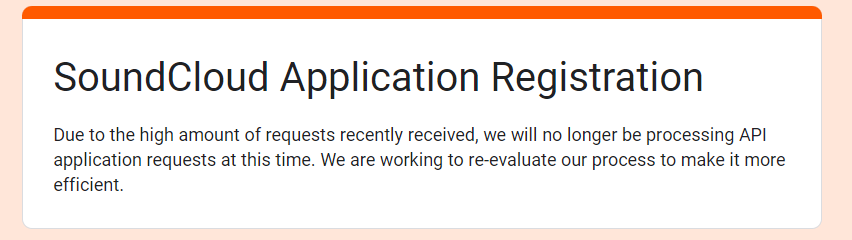

Unfortunately, fate was not very kind to me. Due to SoundCloud's API not accepting new apps, I have no way of utilizing it to help me in my data collection :(

However, I did look into what the API offers if I were able to use it. The silver lining is that the most this API could have done to help me is listing my liked tracks and playlists, which I would then either have to quantify by genre (if possible) or try to directly link these tracks to their equivalent on Spotify in order to access the track data and audio features. 

### YouTube

The next best thing to SoundCloud to get a sample of my music taste is YouTube. I typically like to watch music videos when I'm not in my car or in public, so YouTube is a great tool for that. A lot of the time I simply find the "My Mix" playlist that YouTube auto-generates and put it on in the background, but I also have a few playlists that I made/found depending on the mood I'm in. If I could use the API to assemble these playlists or help work with my data in some way, this would help my data collection process greatly. 

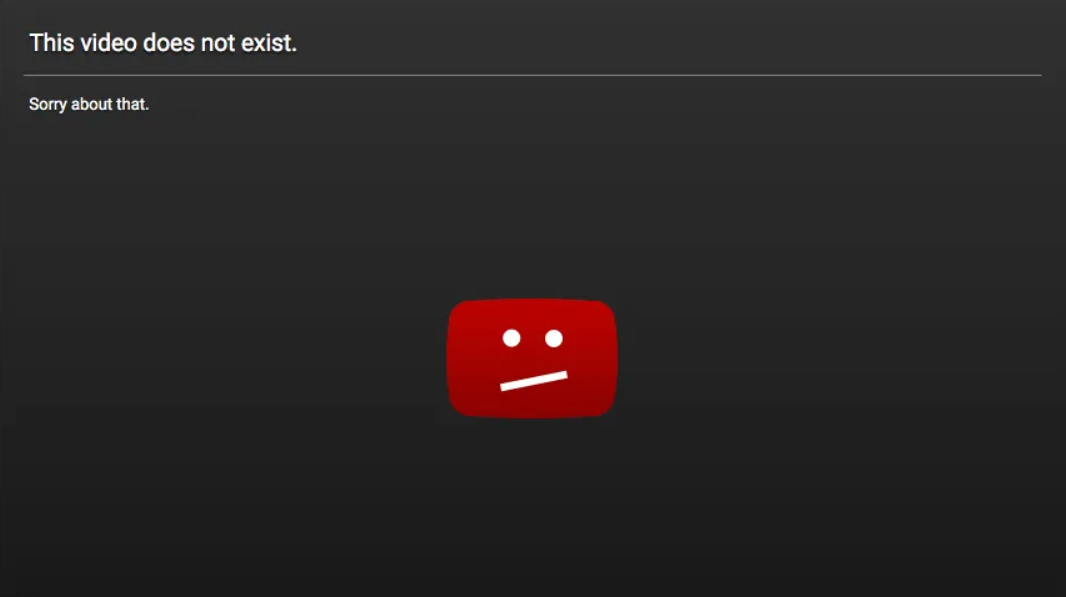

Once again, though, my plans were halted. YouTube's API is not catered towards Music, and they do not provide an API for YouTube Music specifically. The situation would be largely the same as if I were to use SoundCloud's API, as the most I could gain would be the playlist/video IDs and I would then have to compile them in some other way to translate those tracks to Spotify. So unfortunately, I won't be using this API either. 

### YTMusicapi

When I said there wasn't an API for YouTube Music, I meant there wasn't an "official" API. Thankfully, some great people have made a workaround for this issue. The [ytmusicapi](https://ytmusicapi.readthedocs.io/en/stable/index.html) seems to be a bit better for my purposes, but I was slightly worried that it wouldn't be able to help me since I do not use YouTube Music specifically. After looking into it, though, I was relieved to see that it tracks what I listen to from the main website as well. 

Unfortunately this API wasn't working for me either, so I was unable to use it for the data collection process. I did eventually figure out a solution, however, so I will be using it to assist me in my data analysis portion. 

It saddens me a little that I couldn't use this API for my data collection, since it had the most promise in terms of grouping things together neatly, being an unbiased source, and potentially making the process of matching each track up to Spotify automated. Although, I only found an example of the reverse of this automation, and even then, it looked like they were using Google Play Music, which was replaced by YouTube Music.

### What now?

So with all of my avenues of unbiased data collection exhausted, how can I continue this report in good conscious? Luckily, the purposes of my study is to compare tracks to see what draws me to a particular song rather than what keeps me listening to a song. With that in mind, I shouldn't need to use my most listened-to tracks. Instead, I can simply do an analysis of songs I listen to by genre and make sure that my sample sizes are relatively even. 

My exploration of these other platforms was not in vain, though. While exploring YouTube Music, I found my "2022 Recap," which contains a decent sample of my music taste that I can use as a basis for the tracks I find on Spotify. On top of this, I can also use my SoundCloud playlists, as those are what I usually listen to most. 

## The Data

Through the guidance of my SoundCloud playlists and 2022 Recap, I have gathered a sizable sample of music from various genres/artists. I went through and made specialized Spotify playlists for each group. While manually doing this may have been harder than necessary and risked my internal bias getting in the way, I believe this may have been the best way of going about this, as there were many songs that I was able to omit from my playlists that I do not frequently listen to/have never listened to. Including them by simply taking entire premade albums could have muddied the data and potentially led to false conclusions, so I'm happy I went about the data collection in this way. 

In [6]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

The first group is music related to the rhythm game *Friday Night Funkin'* since it is basically its own genre at this point. While none of the songs included are from the original game, they are some of the ones I listen to most frequently. Unfortunately, I was unable to get as many as I would have liked due to them being unavailable on Spotify. 

In [12]:
fnf_id = '7mf0cprxlKPPC87tQShX72'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fnf_id)
fnf_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
fnf_dict = json.loads(fnf_tracks.text)
newList = []
for x in fnf_dict['items']: newList.append(x['track']['id'])
fnf_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(fnf_track_strings)
fnf_features = requests.get(track_features_endpoint, headers = session_header)
fnf_dict = json.loads(fnf_features.text)
fnf_df = pd.DataFrame(fnf_dict['audio_features'])

Since I'm working with playlists and not albums, the formatting is slightly different, which makes gathering individual track IDs a bit harder. I had to look up a solution as I was having trouble figuring out how to isolate the ID I wanted to grab, so thank you *toobs* from Stack Overflow! I'm still unsure how this worked since there doesn't seem to be anything linking 'track' to 'id', but I'm grateful that it does.

The second group contains songs from the artist *Jackie Extreme.* She is one of my favorite artists and has a very unique style, so I figured grouping her songs together made the most sense. 

In [14]:
je_id = '6D9d7XqQF9sWKc2owPgIYm'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(je_id)
je_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
je_dict = json.loads(je_tracks.text)
newList = []
for x in je_dict['items']: newList.append(x['track']['id'])
je_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(je_track_strings)
je_features = requests.get(track_features_endpoint, headers = session_header)
je_dict = json.loads(je_features.text)
je_df = pd.DataFrame(je_dict['audio_features'])

The third group contains songs by the band *Little Big.* They are a Russian rave band whose style is a mix of hip hop and pop-punk. I got into their music because of some of their more humorous songs, but they also often put a fair bit of social commentary into their work as well (Mostly in the visuals of their music videos, since a lot of their songs don't have very many lyrics). They are also distinct enough to separate into their own category.

In [15]:
lb_id = '4DVCkKp17qpYbGQW2UkVPi'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(lb_id)
lb_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
lb_dict = json.loads(lb_tracks.text)
newList = []
for x in lb_dict['items']: newList.append(x['track']['id'])
lb_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(lb_track_strings)
lb_features = requests.get(track_features_endpoint, headers = session_header)
lb_dict = json.loads(lb_features.text)
lb_df = pd.DataFrame(lb_dict['audio_features'])

Fourth is music from the artist *GHOST and Pals.* They make mostly vocaloid songs, but their style differs from other vocaloid songs enough to put them in a separate category. I also listen to their stuff much more than other Vocaloid artists, so I figured that grouping them separately made the most sense. 

In [16]:
gap_id = '6li4l3SVN8KzhlutvLjK9z'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(gap_id)
gap_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
gap_dict = json.loads(gap_tracks.text)
newList = []
for x in gap_dict['items']: newList.append(x['track']['id'])
gap_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(gap_track_strings)
gap_features = requests.get(track_features_endpoint, headers = session_header)
gap_dict = json.loads(gap_features.text)
gap_df = pd.DataFrame(gap_dict['audio_features'])

Fifth is the rest of the vocaloid genre, or what I listen to from it. Since this genre contains anything that uses a vocaloid, the content of the songs can differ, but they generally have a similar feel to them. I don't believe this will have an adverse effect on the data analysis, but I will be keeping it in mind. 

In [17]:
voc_id = '166sF6qqjePc0RNEDAymVG'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(voc_id)
voc_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
voc_dict = json.loads(voc_tracks.text)
newList = []
for x in voc_dict['items']: newList.append(x['track']['id'])
voc_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(voc_track_strings)
voc_features = requests.get(track_features_endpoint, headers = session_header)
voc_dict = json.loads(voc_features.text)
voc_df = pd.DataFrame(voc_dict['audio_features'])

Sixth is anything related to the game *Five Nights at Freddy's*. I'm not ashamed to admit that I still religiously listen to FNaF music, which is also why this is the category with the largest sample size. For anyone who is unaware, the game *Five Nights at Freddy's* has spawned its own genre of music that has mostly died out at this point, but is still on life-support thanks to a few creators. I'm not entirely sure why it started, but I think it's mostly *The Living Tombstone's* fault, who's music is at the top of the list. 

In [18]:
fnaf_id = '5bxH8jlImkGpOPksToxYPA'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(fnaf_id)
fnaf_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
fnaf_dict = json.loads(fnaf_tracks.text)
newList = []
for x in fnaf_dict['items']: newList.append(x['track']['id'])
fnaf_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(fnaf_track_strings)
fnaf_features = requests.get(track_features_endpoint, headers = session_header)
fnaf_dict = json.loads(fnaf_features.text)
fnaf_df = pd.DataFrame(fnaf_dict['audio_features'])

Seventh contains songs by the artist *SharaX,* who mostly makes music related to the game Undertale, but sometimes the game *Team Fortress 2*, and even original music as well. Her style usually uses instruments in place of lyrics, so watching the videos on YouTube is the most optimal way of enjoying her stuff (unless you've memorized every lyric like I have). 

In [19]:
shx_id = '6a7s1xptiOjKeHzH79Z0Ya'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(shx_id)
shx_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
shx_dict = json.loads(shx_tracks.text)
newList = []
for x in shx_dict['items']: newList.append(x['track']['id'])
shx_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(shx_track_strings)
shx_features = requests.get(track_features_endpoint, headers = session_header)
shx_dict = json.loads(shx_features.text)
shx_df = pd.DataFrame(shx_dict['audio_features'])

Eighth is music by the artist *Bo Burnham.* Most of the music here is from *INSIDE* and *INSIDE: The Outtakes,* but also includes some of his earlier music as well. I've always loved his comedy music and it certainly deserves a category of its own.

In [20]:
bo_id = '6ycTIreGcPQrqtsgxpigtp'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(bo_id)
bo_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
bo_dict = json.loads(bo_tracks.text)
newList = []
for x in bo_dict['items']: newList.append(x['track']['id'])
bo_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(bo_track_strings)
bo_features = requests.get(track_features_endpoint, headers = session_header)
bo_dict = json.loads(bo_features.text)
bo_df = pd.DataFrame(bo_dict['audio_features'])

Ninth is most of the music by the artist *Madame Macabre.* She is an amazing artist that made a lot of creepypasta-related songs. All of her stuff is pleasantly dark, and is definitely in its own category. Some of the songs included here are also FNaF-related, but I included them here both because the FNaF category was too big and because I wanted this category to not be too short.   

In [21]:
mm_id = '22xmyxeDEiubRMRxnM0S5O'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(mm_id)
mm_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
mm_dict = json.loads(mm_tracks.text)
newList = []
for x in mm_dict['items']: newList.append(x['track']['id'])
mm_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(mm_track_strings)
mm_features = requests.get(track_features_endpoint, headers = session_header)
mm_dict = json.loads(mm_features.text)
mm_df = pd.DataFrame(mm_dict['audio_features'])

Tenth is songs by *Billie Eilish.* I'm a fan of her earlier stuff that was a bit darker, but also just enjoy pretty much all of her stuff in general. This is another category that might be better off separated into finer categories, but I will keep an eye on it as well. 

In [23]:
be_id = '16viF7ysjx2FjVpovj6d7b'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(be_id)
be_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
be_dict = json.loads(be_tracks.text)
newList = []
for x in be_dict['items']: newList.append(x['track']['id'])
be_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(be_track_strings)
be_features = requests.get(track_features_endpoint, headers = session_header)
be_dict = json.loads(be_features.text)
be_df = pd.DataFrame(be_dict['audio_features'])

Lastly, I have a Miscellaneous category. I included this for several reasons, the first of which being that I didn't feel like my entire taste in music was captured without it. Mostly though, I wanted to throw a bunch of songs semi-randomly together as somewhat of a control for my analysis. Hopefully this helps disprove any incorrect assumptions if I happen to make them.

In [24]:
misc_id = '1vF19INPusIepThbI2ute1'
playlist_tracks_endpoint = "https://api.spotify.com/v1/playlists/{}/tracks".format(misc_id)
misc_tracks = requests.get(playlist_tracks_endpoint, headers = session_header)
misc_dict = json.loads(misc_tracks.text)
newList = []
for x in misc_dict['items']: newList.append(x['track']['id'])
misc_track_strings = ','.join(str(x) for x in newList)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(misc_track_strings)
misc_features = requests.get(track_features_endpoint,headers = session_header)
misc_dict = json.loads(misc_features.text)
misc_df = pd.DataFrame(misc_dict['audio_features'])

After making the individual DataFrames, I gave them each names under the new 'playlist' column in order to sort them later on.

In [26]:
fnf_df['playlist'] = ['FNF'] * len(fnf_df.index)
je_df['playlist'] = ['Jackie Extreme'] * len(je_df.index)
lb_df['playlist'] = ['Little Big'] * len(lb_df.index)
gap_df['playlist'] = ['GHOST and Pals'] * len(gap_df.index)
voc_df['playlist'] = ['Vocaloid'] * len(voc_df.index)
fnaf_df['playlist'] = ['FNAF'] * len(fnaf_df.index)
shx_df['playlist'] = ['SharaX'] * len(shx_df.index)
bo_df['playlist'] = ['Bo Burnham'] * len(bo_df.index)
mm_df['playlist'] = ['Madame Macabre'] * len(mm_df.index)
be_df['playlist'] = ['Billie Eilish'] * len(be_df.index)
misc_df['playlist'] = ['Miscellaneous'] * len(misc_df.index)

After adding something to differentiate the categories, I shoved them all into one DataFrame and exported them to a file for future use. With all of that dealt with, I can now move onto the data analysis.

In [27]:
audio_features = pd.concat([fnf_df, je_df, lb_df, gap_df, voc_df, fnaf_df, shx_df, bo_df, mm_df, be_df, misc_df])

In [28]:
audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist
0,0.593,0.869,5,-7.528,0,0.0262,0.000688,0.026500,0.0984,0.334,103.006,audio_features,7xI46Xrown39kIBSrXxOVm,spotify:track:7xI46Xrown39kIBSrXxOVm,https://api.spotify.com/v1/tracks/7xI46Xrown39...,https://api.spotify.com/v1/audio-analysis/7xI4...,137476,4,FNF
1,0.460,0.995,6,-3.091,1,0.0489,0.000196,0.000026,0.1020,0.206,102.975,audio_features,7KfOLgPmXLh7OBRannQTsR,spotify:track:7KfOLgPmXLh7OBRannQTsR,https://api.spotify.com/v1/tracks/7KfOLgPmXLh7...,https://api.spotify.com/v1/audio-analysis/7KfO...,146834,4,FNF
2,0.629,0.774,10,-12.339,0,0.0544,0.506000,0.961000,0.1340,0.296,161.943,audio_features,1tnuwCXkCq3WCH1ocwVAag,spotify:track:1tnuwCXkCq3WCH1ocwVAag,https://api.spotify.com/v1/tracks/1tnuwCXkCq3W...,https://api.spotify.com/v1/audio-analysis/1tnu...,128087,4,FNF
3,0.467,0.671,0,-10.817,0,0.0865,0.016900,0.014400,0.0843,0.245,200.116,audio_features,4aMVQBUrFfVhL0vhtxv0KD,spotify:track:4aMVQBUrFfVhL0vhtxv0KD,https://api.spotify.com/v1/tracks/4aMVQBUrFfVh...,https://api.spotify.com/v1/audio-analysis/4aMV...,247399,4,FNF
4,0.615,0.918,9,-8.790,1,0.0677,0.164000,0.063100,0.0724,0.783,158.086,audio_features,2JhIaTWHa6wmEz5df9LwiE,spotify:track:2JhIaTWHa6wmEz5df9LwiE,https://api.spotify.com/v1/tracks/2JhIaTWHa6wm...,https://api.spotify.com/v1/audio-analysis/2JhI...,127423,4,FNF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,0.769,0.924,5,-5.263,0,0.0510,0.596000,0.015600,0.1140,0.880,123.989,audio_features,0thLhIqWsqqycEqFONOyhu,spotify:track:0thLhIqWsqqycEqFONOyhu,https://api.spotify.com/v1/tracks/0thLhIqWsqqy...,https://api.spotify.com/v1/audio-analysis/0thL...,229805,4,Miscellaneous
24,0.675,0.925,0,-3.065,1,0.0433,0.020600,0.003110,0.5680,0.710,132.076,audio_features,58FJeHcQyom7lZbTfyy3bM,spotify:track:58FJeHcQyom7lZbTfyy3bM,https://api.spotify.com/v1/tracks/58FJeHcQyom7...,https://api.spotify.com/v1/audio-analysis/58FJ...,232831,4,Miscellaneous
25,0.722,0.745,7,-4.164,1,0.2560,0.247000,0.000000,0.4190,0.520,77.029,audio_features,5UlnuulVAVmmesw4VzqHdG,spotify:track:5UlnuulVAVmmesw4VzqHdG,https://api.spotify.com/v1/tracks/5UlnuulVAVmm...,https://api.spotify.com/v1/audio-analysis/5Uln...,173381,4,Miscellaneous
26,0.652,0.786,5,-3.761,0,0.0394,0.085900,0.000002,0.0616,0.645,127.941,audio_features,64UmuvjJk7CxLZB6pKTrsS,spotify:track:64UmuvjJk7CxLZB6pKTrsS,https://api.spotify.com/v1/tracks/64UmuvjJk7Cx...,https://api.spotify.com/v1/audio-analysis/64Um...,245625,4,Miscellaneous


In [29]:
audio_features.to_csv('final_audio_features.csv')

In [52]:
fr_af = pd.read_csv('final_audio_features.csv', sep = ',')

## Data Analysis

Now that we have our data, I need to look at the audio features for our tracks and compare their similarities and differences. To start off, I am going to look at danceability.

First, I am going to look at all of the tracks to determine the distribution of the data.

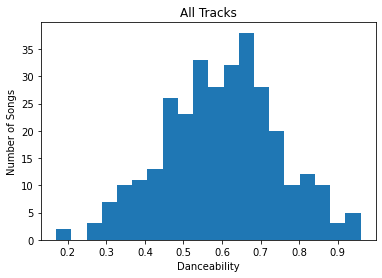

In [7]:
fig1, ax1 = plt.subplots()
ax1.hist(fr_af['danceability'], bins = 20)
ax1.set_xlabel('Danceability')
ax1.set_ylabel('Number of Songs')
ax1.set_title('All Tracks')

plt.show()

It appears that these tracks are close to being normally distributed, with a wide range from almost 0 to 1. My taste in music is now scientifically normal, meaning you're legally not allowed to judge me.    

To expedite the analysis as much as possible, I will now map all of the categories in their own box plots to determine where each playlist lies in terms of danceability and which ones potentially have connections that can be made. 

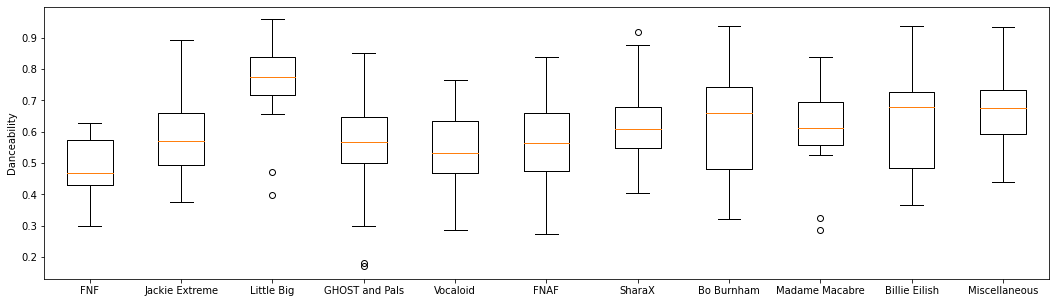

In [83]:
fig2, ax2 = plt.subplots(figsize = (18, 5))

fnf_d = fr_af[fr_af['playlist'] == 'FNF']['danceability']
je_d = fr_af[fr_af['playlist'] == 'Jackie Extreme']['danceability']
lb_d = fr_af[fr_af['playlist'] == 'Little Big']['danceability']
gap_d = fr_af[fr_af['playlist'] == 'GHOST and Pals']['danceability']
voc_d = fr_af[fr_af['playlist'] == 'Vocaloid']['danceability']
fnaf_d = fr_af[fr_af['playlist'] == 'FNAF']['danceability']
shx_d = fr_af[fr_af['playlist'] == 'SharaX']['danceability']
bo_d = fr_af[fr_af['playlist'] == 'Bo Burnham']['danceability']
mm_d = fr_af[fr_af['playlist'] == 'Madame Macabre']['danceability']
be_d = fr_af[fr_af['playlist'] == 'Billie Eilish']['danceability']
misc_d = fr_af[fr_af['playlist'] == 'Miscellaneous']['danceability']

ax2.boxplot([fnf_d, je_d, lb_d, gap_d, voc_d, fnaf_d, shx_d, bo_d, mm_d, be_d, misc_d])
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['FNF', 'Jackie Extreme', 'Little Big', 'GHOST and Pals', 'Vocaloid', 'FNAF', 'SharaX', 'Bo Burnham', 'Madame Macabre', 'Billie Eilish', 'Miscellaneous'])
ax2.set_ylabel('Danceability')

plt.show()

From this initial grouping, it doesn't really say much at first glance. What I found interesting, though, was that the Friday Night Funkin' category skewed lower in danceability. This struck me as especially odd because those songs come from a rhythm game. Madame Macabre's music suprised me as well, but for the opposite reason, as most of her stuff is darker and not what I would have expected to be high in danceability. Little Big's music is about what I expected, as they are a rave band. I'm interested to see which ones are the two outliers, though.

The next thing I'm interested in is valence. I expect most of these to skew towards positive, however, there are definitely a few that should be a bit more negative. I'm going to follow the same process as danceability for this variable as well.

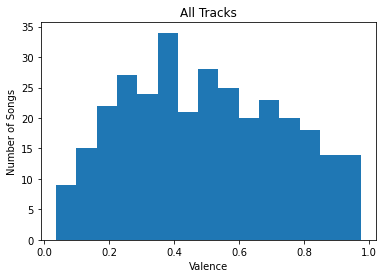

In [11]:
fig3, ax3 = plt.subplots()
ax3.hist(fr_af['valence'], bins = 15)
ax3.set_xlabel('Valence')
ax3.set_ylabel('Number of Songs')
ax3.set_title('All Tracks')

plt.show()

Once again, a very wide range here. The data distribution is still somewhat normal, but much more evenly distributed. 

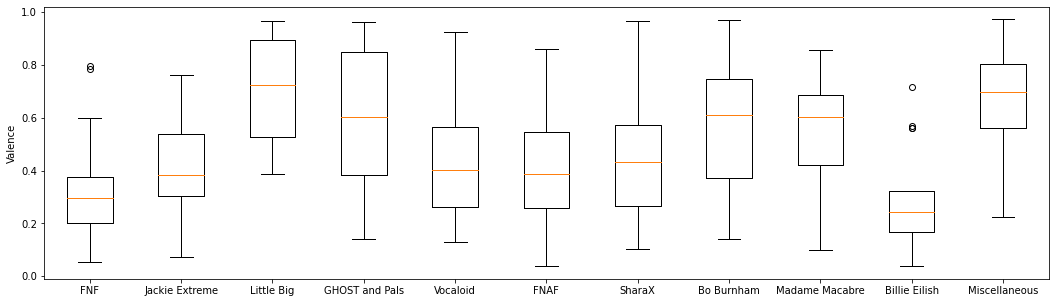

In [89]:
fig4, ax4 = plt.subplots(figsize = (18, 5))

fnf_v = fr_af[fr_af['playlist'] == 'FNF']['valence']
je_v = fr_af[fr_af['playlist'] == 'Jackie Extreme']['valence']
lb_v = fr_af[fr_af['playlist'] == 'Little Big']['valence']
gap_v = fr_af[fr_af['playlist'] == 'GHOST and Pals']['valence']
voc_v = fr_af[fr_af['playlist'] == 'Vocaloid']['valence']
fnaf_v = fr_af[fr_af['playlist'] == 'FNAF']['valence']
shx_v = fr_af[fr_af['playlist'] == 'SharaX']['valence']
bo_v = fr_af[fr_af['playlist'] == 'Bo Burnham']['valence']
mm_v = fr_af[fr_af['playlist'] == 'Madame Macabre']['valence']
be_v = fr_af[fr_af['playlist'] == 'Billie Eilish']['valence']
misc_v = fr_af[fr_af['playlist'] == 'Miscellaneous']['valence']

ax4.boxplot([fnf_v, je_v, lb_v, gap_v, voc_v, fnaf_v, shx_v, bo_v, mm_v, be_v, misc_v])
ax4.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['FNF', 'Jackie Extreme', 'Little Big', 'GHOST and Pals', 'Vocaloid', 'FNAF', 'SharaX', 'Bo Burnham', 'Madame Macabre', 'Billie Eilish', 'Miscellaneous'])
ax4.set_ylabel('Valence')

plt.show()

A bit more of what I expected this time. Most of the categories like Billie Eilish, FNAF, Vocaloid, and Jackie Extreme make sense to trend lower in positivity. The songs in the FNF category are mostly horror-related, which isn't representative of all FNF songs, but certainly fits the ones that I frequently listen to. Once again, Madame Macabre surprises me with how high the positivity is. My theory for this is that most of her darker stuff has more psychotic energy, which is positive while still being creepy. The same goes for GHOST and Pals, as their stuff is relatively similar. 

Speaking of energy, that is the last main feature that I'm interested in comparing. Let's run these one last time just to see what it looks like.

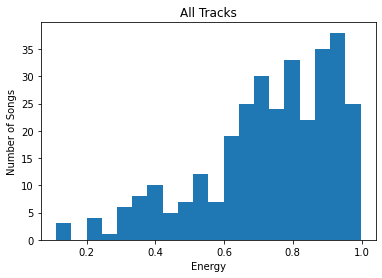

In [14]:
fig5, ax5 = plt.subplots()
ax5.hist(fr_af['energy'], bins = 20)
ax5.set_xlabel('Energy')
ax5.set_ylabel('Number of Songs')
ax5.set_title('All Tracks')

plt.show()

Finally, something interesting! My music preference seems to skew positive, which makes sense based on what I know about myself. What I'm curious about, though, is how energy can be so high when the other two categories have such a wide range.

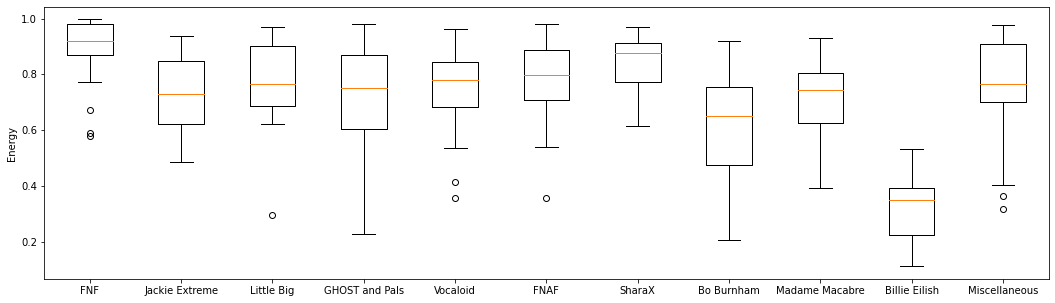

In [82]:
fig6, ax6 = plt.subplots(figsize = (18, 5))

fnf_e = fr_af[fr_af['playlist'] == 'FNF']['energy']
je_e = fr_af[fr_af['playlist'] == 'Jackie Extreme']['energy']
lb_e = fr_af[fr_af['playlist'] == 'Little Big']['energy']
gap_e = fr_af[fr_af['playlist'] == 'GHOST and Pals']['energy']
voc_e = fr_af[fr_af['playlist'] == 'Vocaloid']['energy']
fnaf_e = fr_af[fr_af['playlist'] == 'FNAF']['energy']
shx_e = fr_af[fr_af['playlist'] == 'SharaX']['energy']
bo_e = fr_af[fr_af['playlist'] == 'Bo Burnham']['energy']
mm_e = fr_af[fr_af['playlist'] == 'Madame Macabre']['energy']
be_e = fr_af[fr_af['playlist'] == 'Billie Eilish']['energy']
misc_e = fr_af[fr_af['playlist'] == 'Miscellaneous']['energy']

ax6.boxplot([fnf_e, je_e, lb_e, gap_e, voc_e, fnaf_e, shx_e, bo_e, mm_e, be_e, misc_e])
ax6.set_xticks([1,2,3,4,5,6,7,8,9,10,11], ['FNF', 'Jackie Extreme', 'Little Big', 'GHOST and Pals', 'Vocaloid', 'FNAF', 'SharaX', 'Bo Burnham', 'Madame Macabre', 'Billie Eilish', 'Miscellaneous'])
ax6.set_ylabel('Energy')

plt.show()

Very interesting once again! I knew the FNF category was going to shine in at least one of these tests! Looking at this, it makes much more sense why each feature was surprising me. It seems that danceability and energy have distinct differences, and thinking about it more now, it makes sense that the rhythm game's features are slightly different than what I expected.

What's most intriguing, however, is how low Billie Eilish is compared to all of them. I added this playlist last because I don't listen to her music as much as the others, but I like her stuff too much to not include it. I'm certainly interested to explore this correlation even further, especially since my Miscellaneous category is mostly high energy as well. 

### YTMusic "2022 Recap"

Now that we know what we're looking for, I'd like to go back to the YouTube Music API to see if I can use my personalized "2022 Recap" playlist to my advantage. Ideally, this will provide a way to weight each category of music using data that was collected by a source other than myself. 

In [4]:
ytplaylists = ytm("headers_auth.json").get_library_playlists()

In [10]:
recap = ytm("headers_auth.json").get_playlist(ytplaylists[1]['playlistId'])

In [25]:
recap_df = pd.DataFrame(recap['tracks'])

In [72]:
recap_df.head()

,videoId,title,artists,album,likeStatus,thumbnails,isAvailable,isExplicit,videoType,duration,duration_seconds,feedbackTokens
0,EKOSQGKn5Cw,Solaria / Aura [Original Song],"[{'name': 'GHOST', 'id': 'UCJ5k-jf-8fzMGnpEy27...",None,LIKE,[{'url': 'https://i.ytimg.com/vi/EKOSQGKn5Cw/s...,True,False,MUSIC_VIDEO_TYPE_OMV,5:03,303,NaN
1,aetXqd9B8WE,Q (feat. Gawr Gura),"[{'name': 'Mori Calliope', 'id': 'UCT6fzkIIQuA...",None,LIKE,[{'url': 'https://i.ytimg.com/vi/aetXqd9B8WE/s...,True,False,MUSIC_VIDEO_TYPE_OMV,2:38,158,NaN
2,8JXiXt0D6tw,Who?,"[{'name': 'ㅤ', 'id': 'UCuNlrb3G0BLLDbwhz7EqF8w'}]",None,LIKE,[{'url': 'https://i.ytimg.com/vi/8JXiXt0D6tw/s...,True,False,MUSIC_VIDEO_TYPE_UGC,1:55,115,NaN
3,78JyGZrv-hQ,A good song never dies - An inscryption animatic,"[{'name': 'Najsigt', 'id': 'UCeixHtSF9EKzECJ_x...",None,INDIFFERENT,[{'url': 'https://i.ytimg.com/vi/78JyGZrv-hQ/s...,True,False,MUSIC_VIDEO_TYPE_UGC,3:22,202,NaN
4,oOUw68yWKO8,『 Shadow Shadow 』 歌ってみた ／ Dear:,"[{'name': 'Dear:', 'id': 'UCa_lymbsaIoui_dIQft...",None,LIKE,[{'url': 'https://i.ytimg.com/vi/oOUw68yWKO8/s...,True,False,MUSIC_VIDEO_TYPE_UGC,2:22,142,NaN


Unfortunately, there wasn't a clear 1:1 way of sorting the data into each category that I could find, so I manually tallied them up and plugged them into a Pie Chart. Since there were 100 songs in the playlist, the percentages correlate directly to the number of songs. 

In [ ]:
[print(x) for x in recap_df['title']]

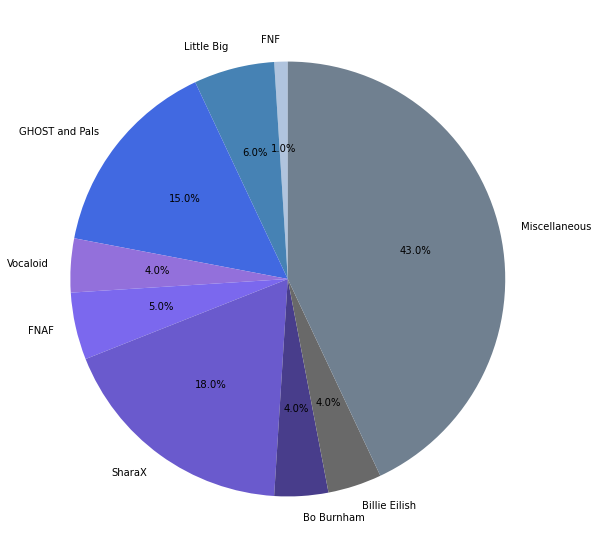

In [71]:
recap_tally = [1, 6, 15, 4, 5, 18, 4, 4, 43]
recap_labels = 'FNF', 'Little Big', 'GHOST and Pals', 'Vocaloid', 'FNAF', 'SharaX', 'Bo Burnham', 'Billie Eilish', 'Miscellaneous'

fig7, ax7 = plt.subplots()
fig7.set_figwidth(10)
fig7.set_figheight(10)
ax7.pie(recap_tally, labels = recap_labels, autopct = '%1.1F%%', colors = ['lightsteelblue', 'steelblue', 'royalblue', 'mediumpurple', 'mediumslateblue', 'slateblue', 'darkslateblue', 'dimgrey', 'slategrey'], startangle = 90 )
plt.show()

Now, if you are an astute observer, you will notice that two categories are missing from this pie chart, those being 'Jackie Extreme' and 'Madame Macabre'. In the case of Jackie Extreme, this makes some sense since I mostly listen to her on SoundCloud and her YouTube channel doesn't have many songs. In Madame Macabre's case, this is baffling to me, as her stuff is consistently included in the "My Mix" playlist. The fact that not a single song was included in the Recap is very worrisome. 

There's also the 'FNF' category, which concerns me as well. I believe the reason only one song showed up for this category is because the videos I watch on YouTube are mostly gameplay with all of the songs included, so YouTube Music doesn't have a match for it. I also mostly listen to this category on SoundCloud as well, so that is also not represented in this visualization.

Then there's the issue of the immense size of the Miscellaneous category, this category included everything in my Miscellaneous playlist already, as well as anything that didn't fit into the other categories. What I noticed while inspecting this category, though, is that the Recap seemed to grasp at a few songs that I watched once or twice but usually skipped when they showed up in "My Mix". I'm very intrigued to know why these few were included when not one Madame Macabre song made it in. 

Needless to say, this Recap alone is not enough to make any solid conclusions from, and with SoundCloud's API just out of reach, I have no other outside sources to gauge how I should weight these categories. However, I will keep this data in mind as I explore further connections.

### Energy

Let's now explore the Energy measurement a bit further, as it was the clear outlier among the other audio features. For comparison, I am going to see how energy relates to both danceability and valence directly. I will then compare valence and danceability to see if anything looks different. 

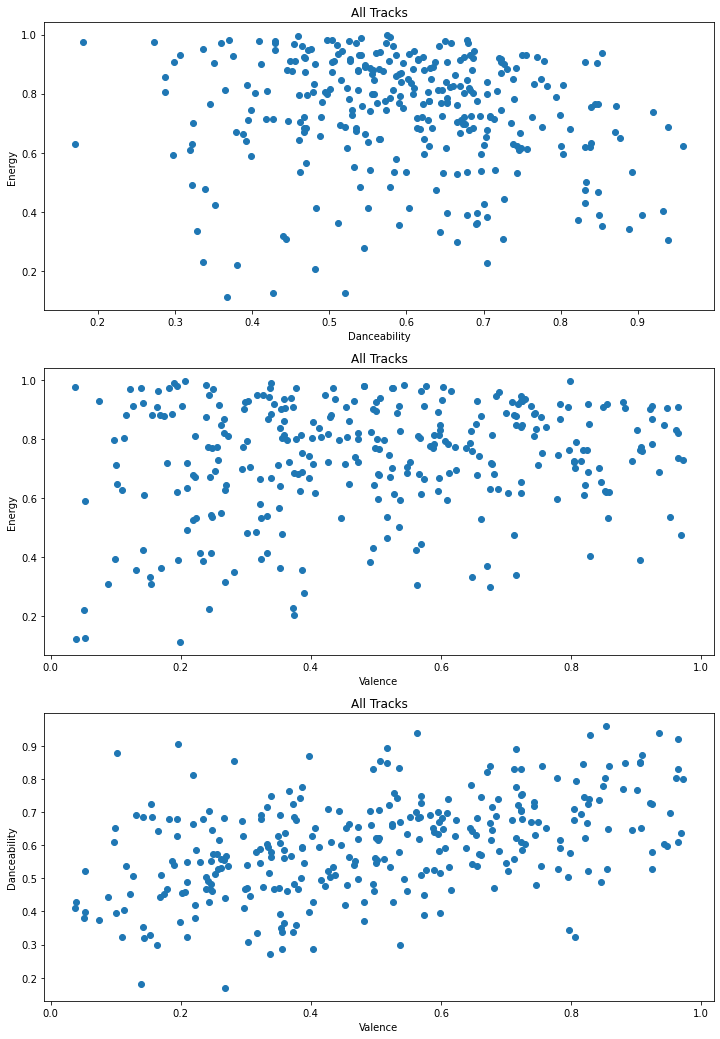

In [98]:
fig8, ax8 = plt.subplots(3, 1, figsize = [12, 18])

ax8[0].scatter(fr_af['danceability'], fr_af['energy'])
ax8[0].set_ylabel('Energy')
ax8[0].set_xlabel('Danceability')
ax8[0].set_title('All Tracks')
ax8[1].scatter(fr_af['valence'], fr_af['energy'])
ax8[1].set_ylabel('Energy')
ax8[1].set_xlabel('Valence')
ax8[1].set_title('All Tracks')
ax8[2].scatter(fr_af['valence'], fr_af['danceability'])
ax8[2].set_ylabel('Danceability')
ax8[2].set_xlabel('Valence')
ax8[2].set_title('All Tracks')

plt.show()

These graphs reveal a few interesting things about the data, the most obvious of which coming from the last graph. The data would seem to suggest that Valence has a direct, positive correlation with Danceability. From the top two graphs, though, we see very little correlation in energy and the other two variables. This tells me two things about the data.

The first is that Danceability and Valence are not significant factors in determining the songs I like. While the relationship of these two variables doesn't say much on its own, the even distribution does. If either of these metrics were a deciding factor in my song selection, I would expect to see clumping somewhere on the imaginary line the third graph is alluding to. 

The second is that Energy has a major impact on my song selection. While energy itself doesn't seem to have any correlation with either variable, what it does show is that high energy undoubtedly prevails regardless of other factors. This suggests that it is significant in the selection process, whereas other aspects are not.

## Results

From my analysis, it seems very likely that a high level of energy plays a large role in my selection and my liking of a song, while my interests in the mood of a song (i.e. sad, happy, or somewhere in between) plays into selection much less. While I would have preferred to have access to more information on my overall listening history in order to apply my findings to my actual listening trends, I do not at this time have a way of doing so. If I were to continue this research, I would wait until SoundCloud begins accepting new apps and try to use more of the data that they provide. 

### API Reflection

Speaking of SoundCloud, along with my main goal of analyzing my data, I had a side goal of exploring as many APIs as possible to determine the pros and cons of each. 

#### SoundCloud API
While I couldn't access it for use, I did explore the reference as I stated earlier. It seems like this API has a slightly better way of sorting tracks by genre than Spotify does, which potentially could've helped me early on. However, genre is a bit more complicated for me, as I mostly follow specific artists. What was most shocking to me about this API was that it doesn't provide a way for the user to access their listening history through the API. It is a prominent and unique feature on the app that I use quite frequently, and could have been very beneficial to my data collection. 

#### YouTube Data API
The obvious downside of YouTube's API for my purposes is that it is not catered toward music in the slightest. The fact that YouTube Music exists and they have yet to update the API to accommodate it or create an official YouTube Music API is astonishing to me. I didn't look into this APIs reference as heavily since I realized it wasn't going to benefit me to do so, but from what I can tell, it is mainly concerned about tracking the performance of videos and cares much less about what they actually contain. Useful information, just not for me.

#### Unofficial YTMusic API
This was obviously the most helpful API behind Spotify, but it is not without its own pitfalls as well. Since it is not an official API, it requires a work-around in order to even get it to function in the first place. This also limits the information that is available, as the data being collected is strictly what is publicly available on the site. I would really have loved if YouTube Music had an API that tracked things on the level that Spotify does, as it could have potentially provided the most useful data. To give it credit, though, it did provide data in a relatively neat and organized manner, which I appreciated very much.

#### Spotify API
Last and most certainly not least is Spotify's API. This is obviously the best API to work with when analyzing tracks specifically, since its audio features quantify things that I hadn't thought were quantifiable before being introduced to it. Their API is also specialized for each and every feature that Spotify offers whether it be playlists, podcasts, audiobooks, etc. There isn't much that Spotify falls short on, which makes it really convenient to use. One thing I will criticize, however, is that I was moderately limited in my selection in a few categories based on unavailability of the tracks. I found that this was mostly a universal issue, as all sites have different tracks available on occasion, but Spotify seemed to work a little differently in this regard. Where SoundCloud has just about anything available, they can vary in quality/ethical usage. Spotify users can only upload music via third party companies, which means the selection will be more sparse in some cases, especially if the artist is smaller.

### Conclusion/Takeaway

While this report is very personal to my music taste specifically, the principles here apply on a broader scale as well. For one, I've provided solid evidence to support that music preference can be determined simply by analyzing a few minor features of the users preferred songs. If someone were to take my findings and apply it to other songs that I may not have heard of, they could potentially predict how much I would enjoy a song and if I would be likely to listen to it again. This concept could be applied at a higher level (and most likely already is) in algorithms that decide which songs get pushed to users next. 

Beyond the research on my music taste, this report also serves as a guide as to which API a researcher might want to proceed with if they are working with music. I certainly learned a lot about the differences between each of them, and I hope that was accurately represented in the report. 

I think there's a lot of places to take this data, whether it be a continuation down the path of self-discovery or a journey into overall sociology, but for now I feel confident about where I ended up.
